In [126]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [127]:
source = pd.read_csv("/Users/dihanislamdhrubo/Downloads/CSE422-Lab-Project-main/data/Updated_Obesity_Dataset.csv")

Categorical features handling

In [128]:
source["Gender"] = source["Gender"].map({"Male" : 0, "Female" : 1})
source["CALC"] = source["CALC"].map({"no" : 0, "Always" : 1, "Sometimes": 0.25, "Frequently": 0.75})
source["FAVC"] = source["FAVC"].map({"no" : 0, "yes" : 1})
source["SCC"] = source["SCC"].map({"no" : 0, "yes" : 1})
source["SMOKE"] = source["SMOKE"].map({"no" : 0, "yes" : 1})
source["family_history_with_overweight"] = source["family_history_with_overweight"].map({"yes": 1, "no": 0})
source["CAEC"] = source["CAEC"].map({"no" : 0, "Always" : 1, "Sometimes": 0.25, "Frequently": 0.75})
source["NObeyesdad"] = source["NObeyesdad"].map({"Normal_Weight" : 1, "Insufficient_Weight": 0, 
                                                 "Overweight_Level_I" : 2, "Overweight_Level_II": 3,
                                                 "Obesity_Type_I": 4, "Obesity_Type_II": 5,
                                                 "Obesity_Type_III": 6})
source.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,1.0,1.62,64.0,0.00,0,2.0,3.0,0,0,2.0,1.0,0.0,1.0,0.25,Public_Transportation,1
1,21.0,1.0,1.52,56.0,0.25,0,3.0,3.0,1,1,3.0,1.0,3.0,0.0,0.25,Public_Transportation,1
2,23.0,0.0,1.80,77.0,0.75,0,2.0,3.0,0,0,2.0,1.0,2.0,1.0,0.25,Public_Transportation,1
3,27.0,0.0,1.80,87.0,0.75,0,3.0,3.0,0,0,2.0,0.0,2.0,0.0,0.25,Walking,2
4,22.0,0.0,1.78,89.8,0.25,0,2.0,1.0,0,0,2.0,0.0,0.0,0.0,0.25,Public_Transportation,3


In [129]:
category_enc = pd.get_dummies(source['MTRANS'])
category_enc.head()

,Automobile,Bike,Motorbike,Public_Transportation,Walking
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,True,False
3,False,False,False,False,True
4,False,False,False,True,False


In [130]:
source['MTRANS'].head()

0    Public_Transportation
1    Public_Transportation
2    Public_Transportation
3                  Walking
4    Public_Transportation
Name: MTRANS, dtype: object

NULL Handling:

In [131]:
source.head(4)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,1.0,1.62,64.0,0.00,0,2.0,3.0,0,0,2.0,1.0,0.0,1.0,0.25,Public_Transportation,1
1,21.0,1.0,1.52,56.0,0.25,0,3.0,3.0,1,1,3.0,1.0,3.0,0.0,0.25,Public_Transportation,1
2,23.0,0.0,1.80,77.0,0.75,0,2.0,3.0,0,0,2.0,1.0,2.0,1.0,0.25,Public_Transportation,1
3,27.0,0.0,1.80,87.0,0.75,0,3.0,3.0,0,0,2.0,0.0,2.0,0.0,0.25,Walking,2


In [132]:
print(source.shape)
print(source.isnull().sum())

(2111, 17)
Age                                0
Gender                            11
Height                             0
Weight                             0
CALC                               0
FAVC                               0
FCVC                               0
NCP                                0
SCC                                0
SMOKE                              0
CH2O                              21
family_history_with_overweight    21
FAF                                0
TUE                                0
CAEC                               0
MTRANS                             0
NObeyesdad                         0
dtype: int64


In [133]:
row_nulls = source.isnull().sum(axis = 1)
rows_with_nulls = row_nulls[row_nulls > 0]
for idx, count in rows_with_nulls.items():
    print(f"Row {idx} → {count} null(s)")

Row 48 → 1 null(s)
Row 70 → 1 null(s)
Row 71 → 1 null(s)
Row 125 → 1 null(s)
Row 143 → 1 null(s)
Row 157 → 1 null(s)
Row 196 → 1 null(s)
Row 205 → 1 null(s)
Row 263 → 1 null(s)
Row 274 → 1 null(s)
Row 281 → 1 null(s)
Row 284 → 1 null(s)
Row 314 → 1 null(s)
Row 324 → 1 null(s)
Row 330 → 1 null(s)
Row 420 → 1 null(s)
Row 463 → 1 null(s)
Row 501 → 1 null(s)
Row 527 → 1 null(s)
Row 544 → 1 null(s)
Row 603 → 1 null(s)
Row 634 → 1 null(s)
Row 722 → 1 null(s)
Row 730 → 1 null(s)
Row 744 → 1 null(s)
Row 792 → 1 null(s)
Row 932 → 1 null(s)
Row 965 → 1 null(s)
Row 995 → 1 null(s)
Row 1040 → 1 null(s)
Row 1178 → 1 null(s)
Row 1241 → 1 null(s)
Row 1257 → 1 null(s)
Row 1411 → 1 null(s)
Row 1442 → 1 null(s)
Row 1444 → 1 null(s)
Row 1449 → 1 null(s)
Row 1450 → 1 null(s)
Row 1454 → 1 null(s)
Row 1483 → 1 null(s)
Row 1561 → 1 null(s)
Row 1563 → 1 null(s)
Row 1582 → 1 null(s)
Row 1635 → 1 null(s)
Row 1656 → 1 null(s)
Row 1673 → 1 null(s)
Row 1812 → 1 null(s)
Row 1831 → 1 null(s)
Row 1916 → 1 null(s)
Row

No row/column had to be dropped ^

NULL Transform

In [134]:
print(source.isnull().sum())

Age                                0
Gender                            11
Height                             0
Weight                             0
CALC                               0
FAVC                               0
FCVC                               0
NCP                                0
SCC                                0
SMOKE                              0
CH2O                              21
family_history_with_overweight    21
FAF                                0
TUE                                0
CAEC                               0
MTRANS                             0
NObeyesdad                         0
dtype: int64


In [135]:
from sklearn.impute import SimpleImputer

median_imputer = SimpleImputer(strategy = "median")
mode_imputer = SimpleImputer(strategy = "most_frequent")

source[["CH2O"]] = median_imputer.fit_transform(source[["CH2O"]])
source[["Gender", "family_history_with_overweight"]] = mode_imputer.fit_transform(source[["Gender", "family_history_with_overweight"]])


In [136]:
print(source.isnull().sum())

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


Took Median value for NULL values in CH2O column and Mode value for NULL values in Gender and family_history_with_overweight colms ^

No Column has to be dropped as all the columns are relevant to the target

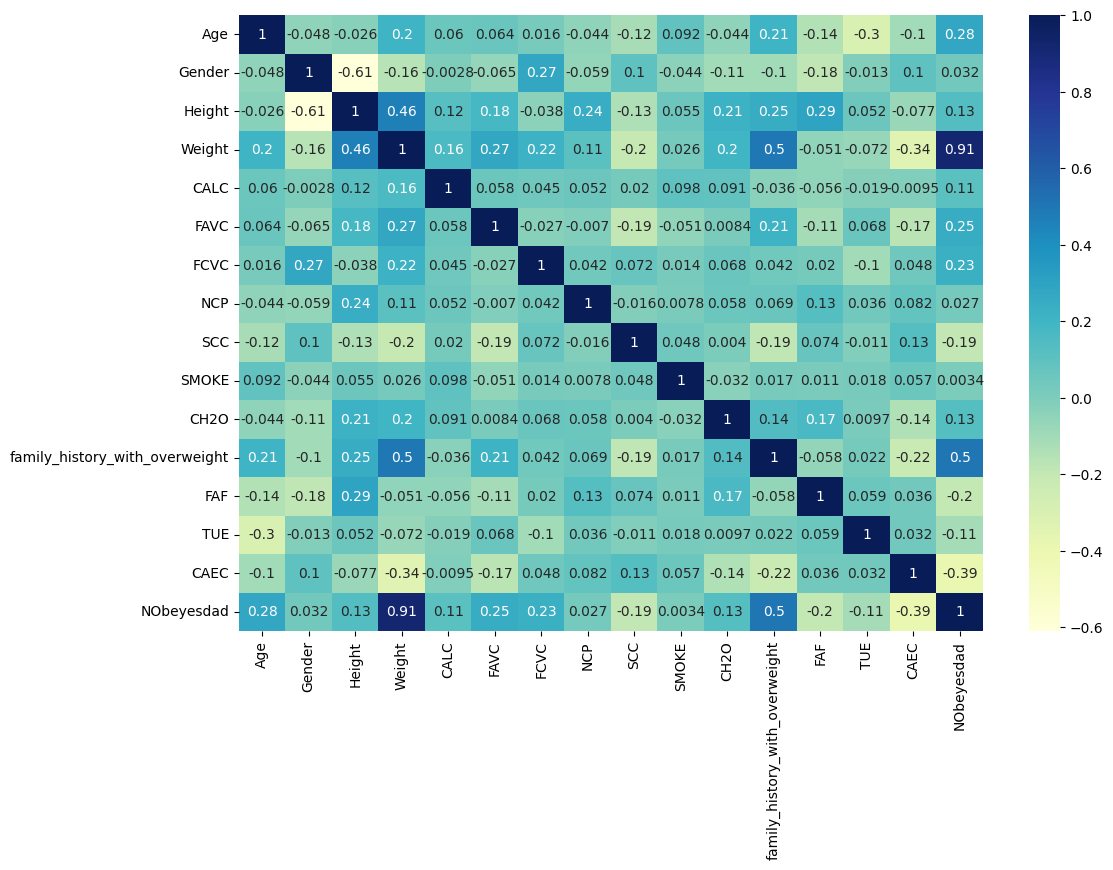

In [137]:
corr = source.corr(numeric_only=True)

plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap = "YlGnBu", annot = True)
plt.show()

No notable feature - feature correlation ^

Normalization:

In [ ]:
source.to_csv("processed_dataset.csv", index = False)


In [ ]:
X_train = pd.read_csv("/Users/dihanislamdhrubo/Downloads/CSE422-Lab-Project-main/data/X_train.csv")
X_test = pd.read_csv("/Users/dihanislamdhrubo/Downloads/CSE422-Lab-Project-main/data/X_test.csv")


numeric_features = ["Age", "Height", "Weight", "CALC", "FCVC", "NCP", 
                    "CH2O", "FAF", "TUE", "CAEC"]

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train[numeric_features])
X_test_scaled = scaler.transform(X_test[numeric_features])